In [1]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import nltk

In [2]:
# Downloading NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\shubham
[nltk_data]     gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\shubham
[nltk_data]     gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\shubham
[nltk_data]     gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Creating a TF-IDF Model Class
class TfIdfModel:
    
    # Constructor
    def __init__(self, docs_data):
        
        self.number_of_docs = len(docs_data)
        self.document_collection = docs_data
        self.tokenized_collection = dict()
        self.vocabulary = set()
        self.inverted_index = dict()
        self.document_frequency = dict()
        self.term_document_frequency = dict()
        self.max_freq_in_doc = dict()
        self.tf_idf_scores = dict()
        
        # Tokenize the documents to build the tokenized collection
        print("Tokenizing the documents...")
        self.tokenize_documents()
        print("Tokenization complete!")
        
        # Create the vocabulary
        print("Creating the vocabulary...")
        self.create_vocabulary()
        print("Vocabulary created!")
        
        # Create the inverted index
        print("Creating the inverted index...")
        self.create_inverted_index()
        print("Inverted index created!")
        
        # Calculate the document frequency
        print("Calculating the document frequency...")
        for term in self.vocabulary:
            self.document_frequency[term] = len(self.inverted_index[term])
        print("Document frequency calculated!")
        
        
        # Calculate the term document frequency
        print("Calculating the term document frequency...")
        for word in self.vocabulary:
            self.term_document_frequency[word] = dict()
            
            for doc in self.inverted_index[word]:
                self.term_document_frequency[word][doc[0]] = doc[1]
                       
            for doc in set(list(self.document_collection.keys())) - set(self.term_document_frequency[word].keys()):
                self.term_document_frequency[word][doc] = 0
                
        print("Term document frequency calculated!")
        
        
        # Calculate the max frequency in a document
        print("Calculating the max frequency in a document...")
        for doc_id in self.document_collection:
            self.max_freq_in_doc[doc_id] = 0
            for word in self.tokenized_collection[doc_id]:
                if self.term_document_frequency[word][doc_id] > self.max_freq_in_doc[doc_id]:
                    self.max_freq_in_doc[doc_id] = self.term_document_frequency[word][doc_id]
        print("Max frequency in a document calculated!")                    

        
        # Calculate the TF-IDF Scores
        print("Calculating the TF-IDF scores...")
        self.calculate_tf_idf_scores()
        print("TF-IDF scores calculated!")
        
    
    # Function to get a list of all documents
    # Input: None
    # Output: List of all documents : List[Str]
    def get_document_list(self):
        return list(self.document_collection.keys())
    
    def get_document_content(self, doc_id):
        try:
            return self.document_collection[doc_id]
        except KeyError:
            raise Exception("KeyError: Document ID not found")
    
    # Function to get the tokens of a document
    # Input: Document ID : Str
    # Output: List of tokens : List[Str]
    def get_document_tokens(self, doc_id):
        try:
            return self.tokenized_collection[doc_id]
        except KeyError:
            raise Exception("KeyError: Document ID not found")
    
    
    # Function to extract keywords from a document
    # Input: Document ID : Str
    # Output: List of keywords : List[Str]
    def extract_keywords(self, text):
        tokens = nltk.word_tokenize(text)
        # Remove stop words
        tokens = [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]
        # Stem the words
        tokens = [nltk.PorterStemmer().stem(word) for word in tokens]
        # Remove Punctuation
        tokens = [word for word in tokens if word.isalpha()]
        return tokens


    # Function to tokenize the documents
    # Input: None
    # Output: None (Updates the tokenized collection dictionary)
    def tokenize_documents(self):
        for doc_id in self.document_collection:
            
            # Tokenize the document
            tokens = self.extract_keywords(self.get_document_content(doc_id))
            
            # Add the tokens to the collection
            self.tokenized_collection[doc_id] = tokens
    
    
    # Function to Create the vocabulary
    # Input: None
    # Output: None (Updates the vocabulary set)
    def create_vocabulary(self):
        for doc_id in self.tokenized_collection:
            self.vocabulary.update(self.tokenized_collection[doc_id])
    
    
    # Function to get the vocabulary
    # Input: None
    # Output: List of vocabulary : List[Str]
    def get_vocabulary(self):
        return list(self.vocabulary)
    
    
    # Function to create the inverted index
    # Input: None
    # Output: None (Updates the inverted index dictionary)
    def create_inverted_index(self):
        
        for word in self.vocabulary:
            self.inverted_index[word] = []

        for doc_id in self.tokenized_collection:

            word_frequency = dict()
            for word in self.tokenized_collection[doc_id]:
                if word in word_frequency:
                    word_frequency[word] += 1
                else:
                    word_frequency[word] = 1
            
            for word in word_frequency:
                self.inverted_index[word].append((doc_id, word_frequency[word]))
            
    # Get the inverted index
    # Input: None
    # Output: Inverted index dictionary : Dict[Str, List[Tuple[Str, Int]]]
    def get_inverted_index(self):
        return self.inverted_index
    
    
    # Get the postings list of a word
    # Input: Word : Str
    # Output: Postings list : List[Tuple[Str, Int]]
    def get_postings_list(self, word):
        try:
            return self.inverted_index[word]
        except KeyError:
            raise Exception("KeyError: Word not found")
    
    
    # Calculate the Tf-IDf scores of the documents
    # Input: None
    # Output: None (Updates the tf-idf scores dictionary)
    def calculate_tf_idf_scores(self):
        for doc in self.document_collection:
            self.tf_idf_scores[doc] = {}
            for word in self.tokenized_collection[doc]:
                self.tf_idf_scores[doc][word] = 0.5 + 0.5*(self.term_document_frequency[word][doc]/self.max_freq_in_doc[doc]) * np.log(self.number_of_docs/self.document_frequency[word] + 1)
    
    # Get Tf-Idf Dataframe
    # Input: None
    # Output: Tf-Idf Dataframe : Dataframe
    def get_tf_idf_dataframe(self):
        return pd.DataFrame.from_dict(tf_idf_model.tf_idf_scores)

READING THE DATA FROM THE DATASET

In [21]:
docs_data = {}
DocumentsPath = '/content/alldocs'
Total_Docs = len(os.listdir(DocumentsPath))
print("# of Documents:", Total_Docs)

# of Documents: 6377


In [22]:
# Read all docs into a dataframe

Files_Not_Read = []

Number_of_Docs_To_Read = 10

DOCS = os.listdir(DocumentsPath)[:Number_of_Docs_To_Read]

# Iterate over all files in the directory
for file in tqdm(DOCS, total=len(DOCS), desc="Reading Documents"):
    
    # Read the file
    with open(DocumentsPath + file, 'r') as f:
        
        # Read the file and store it in a list
        try:
            docs_data[file] = f.read()
        except:
            print("Error in reading file:", file)
            Files_Not_Read.append(file)

# print(docs_data)


Reading Documents:   0%|          | 0/10 [00:00<?, ?it/s]

In [23]:
Total_Docs = len(docs_data)
print("# of Documents Read:", Total_Docs)
print(Files_Not_Read)

# of Documents Read: 10
[]


In [24]:
# Create a TF-IDF Model
tf_idf_model = TfIdfModel(docs_data)

print(tf_idf_model.number_of_docs)
print(tf_idf_model.get_document_list())

Tokenizing the documents...
Tokenization complete!
Creating the vocabulary...
Vocabulary created!
Creating the inverted index...
Inverted index created!
Calculating the document frequency...
Document frequency calculated!
Calculating the term document frequency...
Term document frequency calculated!
Calculating the max frequency in a document...
Max frequency in a document calculated!
Calculating the TF-IDF scores...
TF-IDF scores calculated!
10
['GX000-01-10544170', 'GX000-09-2703409', 'GX000-10-4524900', 'GX000-14-10770491', 'GX000-14-16748010', 'GX000-14-5445022', 'GX000-16-0145015', 'GX000-16-4063715', 'GX000-21-2440731', 'GX000-22-12322384']


In [25]:
print("Vocabulary Size:", len(tf_idf_model.get_vocabulary()))

Vocabulary Size: 3092


In [26]:
# Print tokens of first document
print("Tokens of first document:", tf_idf_model.get_document_tokens(tf_idf_model.get_document_list()[0]))

Tokens of first document: ['link', 'nation', 'cancer', 'institut', 'center', 'cancer', 'research', 'link', 'contact', 'ccr', 'link', 'ccr', 'homepag', 'link', 'nci', 'home', 'link', 'nih', 'home', 'search', 'compar', 'oncolog', 'program', 'home', 'introduct', 'specif', 'aim', 'time', 'for', 'implement', 'background', 'the', 'ccr', 'compar', 'oncolog', 'program', 'compliment', 'number', 'new', 'ccr', 'initi', 'design', 'improv', 'translat', 'process', 'program', 'announc', 'compar', 'oncolog', 'refer', 'studi', 'natur', 'develop', 'cancer', 'anim', 'model', 'human', 'diseas', 'a', 'signific', 'group', 'natur', 'occur', 'cancer', 'develop', 'pet', 'anim', 'primarili', 'cat', 'dog', 'these', 'larg', 'anim', 'cancer', 'share', 'mani', 'featur', 'human', 'cancer', 'includ', 'tumor', 'histolog', 'genet', 'respons', 'convent', 'therapi', 'biolog', 'behavior', 'exampl', 'model', 'includ', 'osteosarcoma', 'lymphoma', 'breast', 'cancer', 'head', 'neck', 'carcinoma', 'prostat', 'cancer', 'soft', 

In [27]:
print("Inverted Index Size:", len(tf_idf_model.get_inverted_index()))
print("Posting list of clinic:", tf_idf_model.get_postings_list("clinic"))

Inverted Index Size: 3092
Posting list of clinic: [('GX000-01-10544170', 9), ('GX000-14-10770491', 1)]


In [28]:
print("Term Document Frequency of clinic:", tf_idf_model.term_document_frequency["clinic"])
print("Document Frequency of clinic:", tf_idf_model.document_frequency['clinic'])
print("Maximum Frequency in Document with ID GX031-01-3503918:", tf_idf_model.max_freq_in_doc['GX031-01-3503918'])

Term Document Frequency of clinic: {'GX000-01-10544170': 9, 'GX000-14-10770491': 1, 'GX000-16-0145015': 0, 'GX000-14-5445022': 0, 'GX000-16-4063715': 0, 'GX000-22-12322384': 0, 'GX000-14-16748010': 0, 'GX000-09-2703409': 0, 'GX000-10-4524900': 0, 'GX000-21-2440731': 0}
Document Frequency of clinic: 2


KeyError: 'GX031-01-3503918'

In [ ]:
# Print the TF-IDF of document with ID GX031-01-3503918
print("TF-IDF of GX031-01-3503918:", tf_idf_model.tf_idf_scores['GX031-01-3503918'])

In [30]:
# Create a dataframe to store the TF-IDF with the document id as the index
tf_idf_df = tf_idf_model.get_tf_idf_dataframe()
# Fill NaN values with 0
tf_idf_df = tf_idf_df.fillna(0)
tf_idf_df.head()

,GX000-01-10544170,GX000-09-2703409,GX000-10-4524900,GX000-14-10770491,GX000-14-16748010,GX000-14-5445022,GX000-16-0145015,GX000-16-4063715,GX000-21-2440731,GX000-22-12322384
link,0.596861,0.504729,0.520756,0.000000,0.505049,0.51868,0.531134,0.517320,0.503148,0.505748
nation,0.532863,0.511232,0.000000,0.520635,0.523981,0.00000,0.536971,0.576390,0.000000,0.510238
cancer,1.395880,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.505933,0.000000,0.000000
institut,0.569598,0.000000,0.569598,0.000000,0.000000,0.00000,0.000000,0.512445,0.501759,0.000000
center,0.530034,0.525662,0.000000,0.509429,0.505479,0.00000,0.511263,0.548334,0.502278,0.503119


In [31]:
# Store the DataFrame to disk
tf_idf_df.to_csv('./TF_IDF_Q3_Part1.csv')

In [33]:
# Extract Queries from query.txt
queries = dict()

TOTAL_QUERIES = 0

query_file = '/content/query.txt'

# Total number of queries
with open(query_file, 'r') as f:
    TOTAL_QUERIES = len(f.readlines())

# Read the query file
with open(query_file, 'r') as f:
    
    # Read the lines one by one
    for line in tqdm(f, desc="Reading Queries", total=TOTAL_QUERIES):
        
        # Remove the newline character
        line = line.strip()
        
        # Query ID
        qID = line.split(' ')[0]
        query_content = " ".join(line.split(' ')[1:])
        
        # Append the query to the list.
        if len(qID.strip()): 
            
            # Check for empty lines
            queries[qID.strip()] = query_content

Reading Queries:   0%|          | 0/84 [00:00<?, ?it/s]

In [34]:
# Printing Queries
for q in queries.items():
    print("Query ID:", q[0])
    print("Query Content:", q[1])

Query ID: 701
Query Content:  describe history oil industry
Query ID: 702
Query Content:  pearl farming operations actual farming operations described culturing pearls japanese pearl productions status pearl farming production
Query ID: 704
Query Content:  goals political views green party
Query ID: 705
Query Content:  identify efforts proposed undertaken world governments seek reduction iraqs foreign debt
Query ID: 706
Query Content:  methods control type ii diabetes
Query ID: 707
Query Content:  evidence aspirin help prevent cancer
Query ID: 708
Query Content:  sources slate stone decorative
Query ID: 709
Query Content:  limits regulations concerning jockey weight horse racing
Query ID: 711
Query Content:  security measures employed train stations due heightened security concerns
Query ID: 712
Query Content:  actual examples pyramid schemes
Query ID: 713
Query Content:  state maryland clean chesapeake bay
Query ID: 714
Query Content:  restrictions placed older persons renewing driver

In [35]:
# Perform the Query Processing
# Time taken to process queries
import time

processed_queries = dict()
TotalProcessingTime = 0

for q in tqdm(queries.items(), desc="Processing Queries", total=len(queries)):

    id = q[0]
    content = q[1]

    t1 = time.time()
    query_keywords = tf_idf_model.extract_keywords(content)
    t2 = time.time()
    
    TotalProcessingTime += (t2 - t1)

    processed_queries[id] = query_keywords

print("Total Processing Time:", TotalProcessingTime)

Processing Queries:   0%|          | 0/82 [00:00<?, ?it/s]

Total Processing Time: 0.14918088912963867


In [36]:
# Print the processed queries
for q in processed_queries.items():
    print("Processed Query ID:", q[0])
    print("Processed Query Content:", q[1])

Processed Query ID: 701
Processed Query Content: ['describ', 'histori', 'oil', 'industri']
Processed Query ID: 702
Processed Query Content: ['pearl', 'farm', 'oper', 'actual', 'farm', 'oper', 'describ', 'cultur', 'pearl', 'japanes', 'pearl', 'product', 'statu', 'pearl', 'farm', 'product']
Processed Query ID: 704
Processed Query Content: ['goal', 'polit', 'view', 'green', 'parti']
Processed Query ID: 705
Processed Query Content: ['identifi', 'effort', 'propos', 'undertaken', 'world', 'govern', 'seek', 'reduct', 'iraq', 'foreign', 'debt']
Processed Query ID: 706
Processed Query Content: ['method', 'control', 'type', 'ii', 'diabet']
Processed Query ID: 707
Processed Query Content: ['evid', 'aspirin', 'help', 'prevent', 'cancer']
Processed Query ID: 708
Processed Query Content: ['sourc', 'slate', 'stone', 'decor']
Processed Query ID: 709
Processed Query Content: ['limit', 'regul', 'concern', 'jockey', 'weight', 'hors', 'race']
Processed Query ID: 711
Processed Query Content: ['secur', 'mea

In [37]:
def query_to_tf_idf(q):

    global tf_idf_df

    document_frequency = tf_idf_model.document_frequency
    
    tf_idf_index = tf_idf_df.index
    
    # Find the TF-IDF of the query
    query_tf_idf = pd.Series(index=tf_idf_index, dtype=float)
    
    # Max Frequency in the query using numpy
    max_freq = np.max([q.count(word) for word in q])

    # for each word in the query_tf_idf
    for word in tf_idf_index:
        
        # Find the TF-IDF of the word in the query
        if word in q:
            tf_idf = 0.5 + 0.5*(q.count(word)/max_freq) * np.log(len(DOCS)/document_frequency[word] + 1)
        else:
            tf_idf = 0
            
        query_tf_idf[word] = tf_idf

    query = np.array(query_tf_idf)
    
    return query

# Function to fetch docs based on the query td-idf
def fetch_docs(query):
    
    global tf_idf_df
    
    # Calculate the eucledian similarity of the query with each document    
    docs_list = list()
    
    for doc in tf_idf_df.columns:
        tf_idf_doc = np.array(tf_idf_df[doc])
        curr_similarity = np.linalg.norm(query - tf_idf_doc)
        docs_list.append((doc, curr_similarity))
    
    # Sort the documents based on the similarity
    docs_list = sorted(docs_list, key=lambda x: x[1])
    
    return docs_list.copy()


def find_top_documents(q, k:int):

    # Function to find the top n documents for a query
    # q: query -> list of keywords
    # k: Number of documents to return

    global tf_idf_df

    query = query_to_tf_idf(q)
    
    # Fetch the ranked documents
    docs_list = fetch_docs(query)
    
    # Return the top n documents
    return docs_list[:k]

print("Sample Query:", queries['701'])
top_docs = find_top_documents(processed_queries['701'], 10)
cnt = 1
for doc in top_docs:
    print("\nRank:", cnt)
    print("Top Document:", doc[0])
    print("Distance:", doc[1])
    cnt += 1

Sample Query:  describe history oil industry

Rank: 1
Top Document: GX000-14-5445022
Distance: 7.4965481572550114

Rank: 2
Top Document: GX000-01-10544170
Distance: 8.657630511876327

Rank: 3
Top Document: GX000-14-16748010
Distance: 9.489189928959012

Rank: 4
Top Document: GX000-16-0145015
Distance: 10.756482888002859

Rank: 5
Top Document: GX000-14-10770491
Distance: 11.072860345910264

Rank: 6
Top Document: GX000-10-4524900
Distance: 11.992871095574953

Rank: 7
Top Document: GX000-22-12322384
Distance: 13.743003884831019

Rank: 8
Top Document: GX000-21-2440731
Distance: 13.922768176393237

Rank: 9
Top Document: GX000-09-2703409
Distance: 14.037786342050241

Rank: 10
Top Document: GX000-16-4063715
Distance: 19.584658177141957


In [38]:
# Function to find top-k docs using relevance feedback
def find_top_docs_relevance_feedback(q, k:int, alpha=0.5, relevant_assumption=5, num_iterations=1):

    # q: query -> list of keywords
    # k: Number of documents to return
    docs_list = []
    
    q = query_to_tf_idf(q)
    
    for _ in range(num_iterations+1):
        
        # Find the top documents
        docs_list = fetch_docs(q)
        relevent_docs = docs_list[:relevant_assumption]
        
        # Centroid of the relevent documents
        relevent_centroid = np.mean(np.array([tf_idf_df[doc] for doc, _ in relevent_docs]), axis=0)
        
        # Update the query with the centroid
        q = alpha*q + (1-alpha)*relevent_centroid

    return docs_list[:k].copy()

In [39]:
# Find Top Documents for each query
results1 = {}
results2 = {}

TotalResultFetchingTime1 = 0  
# Time taken to fetch docs without relevance feedback

TotalResultFetchingTime2 = 0  
# Time taken to fetch docs with relevance feedback

for q in tqdm(processed_queries.items(), desc="Finding Top Documents for Queries", total=len(processed_queries)):
    
    # Find the top documents without relevance feedback
    t1 = time.time()
    results1[q[0]] = find_top_documents(q[1], 10)
    
    # print(q[1])
    t2 = time.time()
    TotalResultFetchingTime1 += (t2 - t1)

print("Total Result Fetching Time Without Relevance Feedback:", TotalResultFetchingTime1)

alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
alpha_time = []

for alpha in alphas:
    
    TotalResultFetchingTime2 = 0

    for q in tqdm(processed_queries.items(), desc="Finding Top Documents for Queries with Pseudo Relevance Feedback", total=len(processed_queries)): 
        
        # First iteration for the query
        if alpha == 0:
            results2[q[0]] = dict()
        
        # Find the top documents using relevance feedback
        t1 = time.time()
        results2[q[0]][alpha] = find_top_docs_relevance_feedback(q[1], 10, alpha=alpha, relevant_assumption=5, num_iterations=1)
        t2 = time.time()
        TotalResultFetchingTime2 += (t2 - t1)
    
    alpha_time.append(TotalResultFetchingTime2)
    print(f"Total Result Fetching Time With Relevance Feedback for alpha = {alpha}:", TotalResultFetchingTime2)


Finding Top Documents for Queries:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time Without Relevance Feedback: 1.564202070236206


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.0: 1.7978816032409668


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.1: 1.524052381515503


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.2: 1.4906318187713623


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.3: 1.653951644897461


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.4: 1.5281484127044678


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.5: 1.7160155773162842


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.6: 1.5882127285003662


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.7: 1.5861358642578125


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.8: 1.610034704208374


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 0.9: 1.5830650329589844


Finding Top Documents for Queries with Pseudo Relevance Feedback:   0%|          | 0/82 [00:00<?, ?it/s]

Total Result Fetching Time With Relevance Feedback for alpha = 1: 1.5532972812652588


In [40]:
# Print the results without relevance feedback
print("\n\nResults Without Relevance Feedback:")

for result in results1.items():
    print("\nQuery ID:", result[0])
    print("\nTop Documents:")
    cnt = 1
    for doc in result[1]:
        print("\nRank:", cnt)
        print("Top Document:", doc[0])
        print("Similarity:", doc[1])
        cnt += 1



Results Without Relevance Feedback:

Query ID: 701

Top Documents:

Rank: 1
Top Document: GX000-14-5445022
Similarity: 7.4965481572550114

Rank: 2
Top Document: GX000-01-10544170
Similarity: 8.657630511876327

Rank: 3
Top Document: GX000-14-16748010
Similarity: 9.489189928959012

Rank: 4
Top Document: GX000-16-0145015
Similarity: 10.756482888002859

Rank: 5
Top Document: GX000-14-10770491
Similarity: 11.072860345910264

Rank: 6
Top Document: GX000-10-4524900
Similarity: 11.992871095574953

Rank: 7
Top Document: GX000-22-12322384
Similarity: 13.743003884831019

Rank: 8
Top Document: GX000-21-2440731
Similarity: 13.922768176393237

Rank: 9
Top Document: GX000-09-2703409
Similarity: 14.037786342050241

Rank: 10
Top Document: GX000-16-4063715
Similarity: 19.584658177141957

Query ID: 702

Top Documents:

Rank: 1
Top Document: GX000-14-5445022
Similarity: 7.022813041931473

Rank: 2
Top Document: GX000-01-10544170
Similarity: 8.36576982563159

Rank: 3
Top Document: GX000-14-16748010
Simila

In [41]:
# Print the results with relevance feedback
print("\n\nResults With Relevance Feedback:")
for result in results2.items():
    
    print("\nQuery ID:", result[0])
    print("\nTop Document:")
    
    for res in result[1].items():
        print("\nAlpha:", f"{res[0]:.1f}", '->', res[1][0])




Results With Relevance Feedback:

Query ID: 701

Top Document:

Alpha: 0.0 -> ('GX000-14-5445022', 6.303533554088715)

Alpha: 0.1 -> ('GX000-14-5445022', 6.192360198109815)

Alpha: 0.2 -> ('GX000-14-5445022', 6.134385689598906)

Alpha: 0.3 -> ('GX000-14-5445022', 6.1311193239396236)

Alpha: 0.4 -> ('GX000-14-5445022', 6.182647810608715)

Alpha: 0.5 -> ('GX000-14-5445022', 6.287624125667216)

Alpha: 0.6 -> ('GX000-14-5445022', 6.44343648617172)

Alpha: 0.7 -> ('GX000-14-5445022', 6.646510645970136)

Alpha: 0.8 -> ('GX000-14-5445022', 6.892670541427942)

Alpha: 0.9 -> ('GX000-14-5445022', 7.177484519548031)

Alpha: 1.0 -> ('GX000-14-5445022', 7.4965481572550114)

Query ID: 702

Top Document:

Alpha: 0.0 -> ('GX000-14-5445022', 6.303533554088715)

Alpha: 0.1 -> ('GX000-14-5445022', 6.184445872159598)

Alpha: 0.2 -> ('GX000-14-5445022', 6.107675122417465)

Alpha: 0.3 -> ('GX000-14-5445022', 6.0748258603434975)

Alpha: 0.4 -> ('GX000-14-5445022', 6.086609256653057)

Alpha: 0.5 -> ('GX000-

In [43]:
# Fetch real outputs from the output.txt file
real_outputs = {}

OUTPUT_FILE = '/content/output.txt'

# Count the number of lines in the output file
TOTAL_LINES = 0
with open(OUTPUT_FILE, 'r') as f:
     TOTAL_LINES = len(f.readlines())

with open(OUTPUT_FILE, 'r') as f:
    for line in tqdm(f, desc="Reading Outputs", total=TOTAL_LINES):
        
        line = line.strip()
        qID = line.split(' ')[0]
        docID = line.split(' ')[1]
        
        if len(qID.strip()): 
            
            # Check for empty lines
            if qID not in real_outputs:
                real_outputs[qID] = []
                
            real_outputs[qID].append(docID)

Reading Outputs:   0%|          | 0/7500 [00:00<?, ?it/s]

In [44]:
print("\nRelevent Documents for Query 701")
print(real_outputs['701'])


Relevent Documents for Query 701
['GX268-35-11839875', 'GX262-28-10569245', 'GX238-57-4348848', 'GX231-53-10990040', 'GX026-56-10685144', 'GX251-23-2115089', 'GX080-84-0195482', 'GX154-76-11248328', 'GX049-70-3440358', 'GX263-63-13628209', 'GX098-89-15335232', 'GX004-05-12123594', 'GX104-28-6788626', 'GX268-22-14058611', 'GX255-56-12408598', 'GX234-98-1840732', 'GX229-87-1373283', 'GX268-15-8388133', 'GX262-86-10646381', 'GX011-07-9890982', 'GX068-83-6288039', 'GX001-90-1790440', 'GX233-85-3091353', 'GX041-21-1063650', 'GX009-43-2374651', 'GX253-43-11798479', 'GX027-06-9235541', 'GX265-35-16021546', 'GX025-72-6112588', 'GX241-10-8918222', 'GX016-21-5150039', 'GX237-15-11380377', 'GX238-65-14632969', 'GX042-08-13377049', 'GX230-73-3953122', 'GX260-74-0957038', 'GX219-74-12797241', 'GX232-43-0102505', 'GX015-52-12130762', 'GX050-47-1511214', 'GX020-08-11326706', 'GX262-13-6419403', 'GX040-62-16463744', 'GX235-12-10767883', 'GX269-34-6746516', 'GX270-62-10329938', 'GX247-24-7579610', 'GX

In [46]:
import csv

# Function to calculate Average Precision and Recall for each query
def calculate_metrics(results, real_outputs, output_file='output.csv'):
    
    # results: Results of the queries : {queryID: [docID, similarity]}
    # real_outputs: Real outputs of the queries : {queryID: [docID]}
    
    MAP = 0

    query_precision = {}
    query_recall = {}
    query_avg_precision = {}

    for q in results.items():
        
        # Calculate the Precision
        true_positives = 0
        average_precision = 0
        
        # For each document in the top 10 documents
        cnt = 1
        for doc in q[1]:
            
            # Check if the document is in the real outputs
            if doc[0] in real_outputs[q[0]]:
                
                # Increment the true positives
                true_positives += 1
                
                # Update the average precision
                average_precision += true_positives/cnt
                
            cnt += 1
        
        # Calculate the Metrics
        precision = true_positives/len(q[1])
        recall = true_positives/len(real_outputs[q[0]])
        average_precision /= len(q[1])
        
        query_precision[q[0]] = precision
        query_recall[q[0]] = recall
        query_avg_precision[q[0]] = average_precision
        
        MAP += average_precision

    MAP /= len(results)

    # Writing data into a csv
    header = ['Query_id', 'Precision', 'Recall', 'Avg_Precision']
    with open(output_file, 'w') as f:
        
        writer = csv.writer(f)
        
        # write the header
        writer.writerow(header)
        
        # write the data
        for q in results.items():
            writer.writerow([q[0], f"{query_precision[q[0]]:.4f}", f"{query_recall[q[0]]:.4f}", f"{query_avg_precision[q[0]]:.4f}"])
    
    return f"{MAP:.4f}"

MAP = calculate_metrics(results1, real_outputs, output_file='performance_output_self_model.csv')

MAP_alpha = []

# Save the results with relevance feedback
# For each alpha
for alpha in alphas:
    
    # Fetch results for each alpha
    res = {}
    
    # For each query
    for q in results2.items():
        res[q[0]] = q[1][alpha]
        
    MAP_alpha.append(calculate_metrics(res, real_outputs, output_file=f'performance_output_with_relevance_feedback_{alpha:.1f}.csv'))

### Authenticating to the elastic cloud

In [51]:
from elasticsearch import Elasticsearch

cloud_id = 'My-first-deployment:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvJDQyNTRhZDc5ZWZlNjRjOWRhYjNiM2Y2ZjMxNGIzM2ZhJDkxOGRmOTkwYzNmYjQ1ZjNiMDExN2NlZDJlMDM2YzUx'
username = 'elastic'
password = 'UNq0VvihukaKsbOIFy1thnI8'
es = Elasticsearch(cloud_id=cloud_id, basic_auth = (username, password))


### Indexing Document into the elastic cloud

In [ ]:
import os

docname_list = []
i = 0
for doc in os.listdir(DocumentsPath):
  
    print(i)
    
    with open(DocumentsPath + doc, 'r') as f:
        lines = ' '.join(f.readlines());
        es.index(index = 'ir_index', id = i, document = {'body': lines})
        docname_list.append(doc)
    i += 1


### Fetch Real Output from output.txt file

In [53]:
from tqdm import tqdm
real_outputs = {}

OUTPUT_FILE = '/content/output.txt'

# Count the number of lines in the output file
TOTAL_LINES = 0
with open(OUTPUT_FILE, 'r') as f:
     TOTAL_LINES = len(f.readlines())

with open(OUTPUT_FILE, 'r') as f:
    for line in tqdm(f, desc="Reading Outputs", total=TOTAL_LINES):
        
        line = line.strip()
        qID = line.split(' ')[0]
        docID = line.split(' ')[1]
        
        if len(qID.strip()): 
            
            # Check for empty lines
            if qID not in real_outputs:
                real_outputs[qID] = []
                
            real_outputs[qID].append(docID)

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


Reading Outputs: 100%|██████████| 7500/7500 [00:00<00:00, 626414.43it/s]


### Querying our model

In [ ]:
results1 = {}
output_observed = []
with open(query_file) as f:
    queries = f.readlines()

    for q in queries:
        q_id = q[:3].strip()
        q_qtext = q[3:]

        if len(q_id):
          
            res = es.search(index = "ir_index", query = {"match": {'body': q_qtext}}, size = 10)
            doc_names = []

            for i in range(len(res['hits']['hits'])):
                doc_names.append(docname_list[int(res['hits']['hits'][i]['_id'])])

            results1[q_id] = doc_names


### Function to calculate Average Precision and Recall for each query

In [56]:
import csv
def calculate_metrics(results, real_outputs, output_file='output.txt'):
    # results: Results of the queries : {queryID: [docID]}
    # real_outputs: Real outputs of the queries : {queryID: [docID]}
    
    MAP = 0

    query_precision = {}
    query_recall = {}
    query_avg_precision = {}

    for q in results.items():
        
        # Calculate the Precision
        true_positives = 0
        average_precision = 0
        
        # For each document in the top 10 documents
        cnt = 1
        for doc in q[1]:
            
            # Check if the document is in the real outputs
            if doc in real_outputs[q[0]]:
                
                # Increment the true positives
                true_positives += 1
                
                # Update the average precision
                average_precision += true_positives/cnt
                
            cnt += 1
        
        # Calculate the Metrics
        precision = true_positives/(len(q[1]) if len(q[1]) else 1)
        recall = true_positives/len(real_outputs[q[0]])
        average_precision /= (len(q[1]) if len(q[1]) else 1)
        
        query_precision[q[0]] = precision
        query_recall[q[0]] = recall
        query_avg_precision[q[0]] = average_precision
        
        MAP += average_precision

    MAP /= len(results)

    # Writing data into a csv
    header = ['Query_id', 'Precision', 'Recall', 'Avg_Precision']
    with open(output_file, 'w') as f:
        
        writer = csv.writer(f)
        
        # write the header
        writer.writerow(header)
        
        # write the data
        for q in results.items():
            writer.writerow([q[0], f"{query_precision[q[0]]:.4f}", f"{query_recall[q[0]]:.4f}", f"{query_avg_precision[q[0]]:.4f}"])
    
    return f"{MAP:.4f}"

### Calculating Metrics

In [ ]:
MAP_es = calculate_metrics(results1, real_outputs, output_file='performance_output_es.csv')

### Alpha vs Time

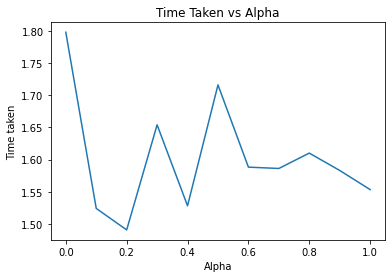

In [60]:
import matplotlib.pyplot as plt

plt.plot(alphas, alpha_time)
 
# naming the x axis
plt.xlabel('Alpha')
# naming the y axis
plt.ylabel('Time taken')
 
# giving a title to my graph
plt.title('Time Taken vs Alpha')
 
# function to show the plot
plt.show()

### MAP vs Alpha

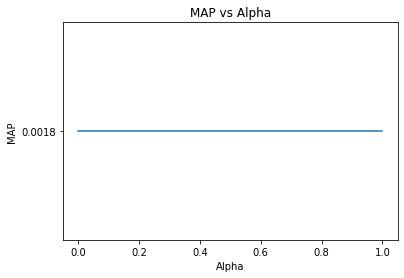

In [61]:
import matplotlib.pyplot as plt

plt.plot(alphas, MAP_alpha)
 
# naming the x axis
plt.xlabel('Alpha')
# naming the y axis
plt.ylabel('MAP')
 
# giving a title to my graph
plt.title('MAP vs Alpha')
 
# function to show the plot
plt.show()

### Comparing Performance Output for self trained model and Elasticsearch model

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/performance_output_self_model.csv')
df2 = pd.read_csv('/content/performance_output_es.csv')


#### Precision

In [ ]:
plt.scatter(df1['Query_id'], df1['Precision'], marker='o', color='red')
plt.scatter(df1['Query_id'], df2['Precision'], marker='+', color='blue')
 
# naming the x axis
plt.xlabel('Query')
# naming the y axis
plt.ylabel('Precision')

plt.legend(['Self', 'ES'], loc='lower right')
 
# giving a title to my graph
plt.title('Precision vs Query')
 
# function to show the plot
plt.show()

#### Recall

In [ ]:
plt.scatter(df1['Query_id'], df1['Recall'], marker='o', color='red')
plt.scatter(df1['Query_id'], df2['Recall'], marker='+', color='blue')
 
# naming the x axis
plt.xlabel('Query')
# naming the y axis
plt.ylabel('Recall')

plt.legend(['Self', 'ES'], loc='lower right')
 
# giving a title to my graph
plt.title('Recall vs Query')
 
# function to show the plot
plt.show()

#### Average Precision

In [ ]:
plt.scatter(df1['Query_id'], df1['Avg_Precision'], marker='o', color='red')
plt.scatter(df1['Query_id'], df2['Avg_Precision'], marker='+', color='blue')
 
# naming the x axis
plt.xlabel('Query')
# naming the y axis
plt.ylabel('Average Precision')

plt.legend(['Self', 'ES'], loc='lower right')
 
# giving a title to my graph
plt.title('Average Precision vs Query')
 
# function to show the plot
plt.show()

In [ ]:
curr_map = 0.0
target_alpha = -1.0

for i in range(len(alphas)):
  if float(MAP_alpha[i]) > curr_map:
    curr_map = float(MAP_alpha[i])
    target_alpha = float(alphas[i])

print(f"Best MAP: {curr_map}")
print(f"Target Alpha: {target_alpha}")